In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.buying.value_counts()

vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64

In [7]:
data.maint.value_counts()

vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64

In [8]:
data.persons.value_counts()
pd.factorize()

4       576
more    576
2       576
Name: persons, dtype: int64

In [9]:
data.lug_boot.value_counts()

med      576
small    576
big      576
Name: lug_boot, dtype: int64

In [17]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [20]:
print(help(pd.factorize))

Help on function factorize in module pandas.core.algorithms:

factorize(values, sort=False, order=None, na_sentinel=-1, size_hint=None)
    Encode the object as an enumerated type or categorical variable.
    
    This method is useful for obtaining a numeric representation of an
    array when all that matters is identifying distinct values. `factorize`
    is available as both a top-level function :func:`pandas.factorize`,
    and as a method :meth:`Series.factorize` and :meth:`Index.factorize`.
    
    Parameters
    ----------
    values : sequence
        A 1-D seqeunce. Sequences that aren't pandas objects are
        coereced to ndarrays before factorization.
    sort : bool, default False
        Sort `uniques` and shuffle `labels` to maintain the
        relationship.
    order
        .. deprecated:: 0.23.0
    
           This parameter has no effect and is deprecated.
    
    na_sentinel : int, default -1
        Value to mark "not found".
    size_hint : int, optional
  

In [24]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [27]:
data.buying,unique = pd.factorize(data.buying)
data.maint,unique = pd.factorize(data.maint)
data.doors,unique = pd.factorize(data.doors)
data.persons,unique = pd.factorize(data.persons)
data.lug_boot,unique = pd.factorize(data.lug_boot)
data.safety,unique = pd.factorize(data.safety)
data['class'],unique = pd.factorize(data['class'])

In [29]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [34]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=45,stratify=y)

In [53]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    grid_search.fit(X,y)
    top_params=grid_search.best_params_
    return top_params

In [54]:
param_grid_dt={'criterion':['gini','entropy'],
              'min_samples_split':[5,10,20,30,40],
              'max_depth':[2,3,5,7,9,15,20],
              'min_samples_leaf':[1,5,10,20,25,30]}

In [55]:
DT = DecisionTreeClassifier()

In [56]:
top_paramtrs=GridSearch_BestParam(X_train,y_train,DT,param_grid_dt,cv=10)
print(top_paramtrs)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [57]:
dt_=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=1,min_samples_split=5)

In [58]:
dt_.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
pred = dt_.predict(X_test)

In [60]:
from sklearn import metrics
print("Accuracy of the model is : ",metrics.accuracy_score(y_test,pred))

Accuracy of the model is :  0.9499036608863198


In [72]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

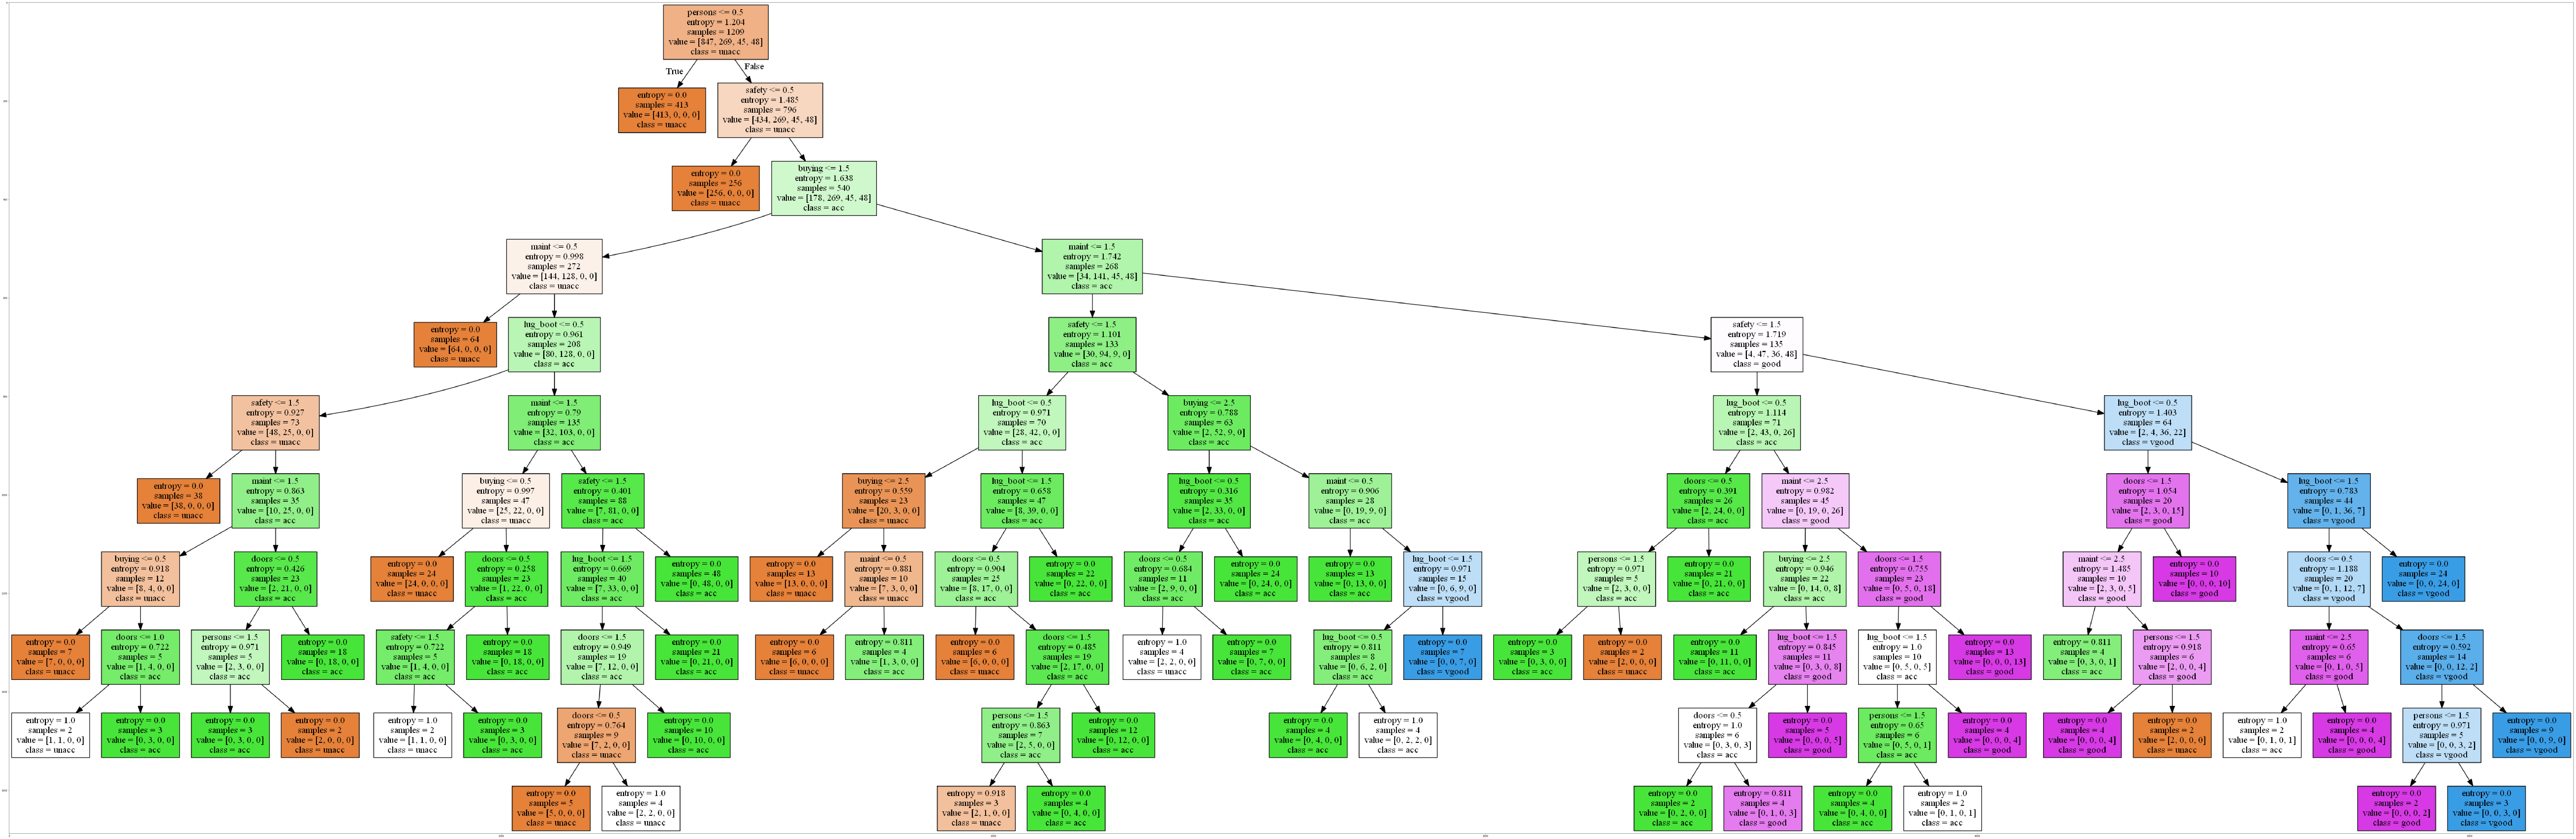

In [74]:
dot_data = StringIO()
filename = "price.png"
featureNames = data.columns[0:-1]
targetNames = data.columns[-1]
out=tree.export_graphviz(dt_,feature_names=featureNames, out_file=dot_data, class_names= unique, filled=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')